In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.datasets import make_classification 
from imblearn.over_sampling import SMOTE 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# from sklearn.model_selection import GridSearchCV
import time
%matplotlib inline

In [2]:
# Loading data
attendance_model_df = pd.read_csv("./Resources/attendance_demographic_location_model_data.csv")
attendance_model_df.head()

,year,month,member,zipcode,small_family_group,medium_family_group,large_family_group,adult,student,military,...,city_LINDON,city_NORTH SALT LAKE,city_HILL AFB,city_SPANISH FORK,city_SALEM,city_WOODS CROSS,city_CENTERVILLE,city_FARMINGTON,city_MAPLETON,city_GOSHEN
0,2022,2,0,84129,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022,2,0,84129,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022,2,0,84129,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022,2,1,84010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,2,1,84010,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
# Define features set
X = attendance_model_df.copy()
X.drop("member", axis=1, inplace=True)
X.head()

,year,month,zipcode,small_family_group,medium_family_group,large_family_group,adult,student,military,teen,...,city_LINDON,city_NORTH SALT LAKE,city_HILL AFB,city_SPANISH FORK,city_SALEM,city_WOODS CROSS,city_CENTERVILLE,city_FARMINGTON,city_MAPLETON,city_GOSHEN
0,2022,2,84129,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022,2,84129,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2022,2,84129,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022,2,84010,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022,2,84010,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Define target vector
y = attendance_model_df["member"].ravel()
y[:5]

array([0, 0, 0, 1, 1], dtype=int64)

In [33]:
# define dataset for model. Full dataset = 606729, with target variable ('member' = 1) = 235697. 20%-30% of this subset = 47,139 - 70709
x, y = make_classification(n_samples=50000) 
smote = SMOTE() 
x_smote, y_smote = smote.fit_resample(x, y) 
  
# print the features and the labels 
print('x_smote:\n', x_smote) 
print('y_smote:\n', y_smote) 

x_smote:
 [[ 0.46680986  0.18255959  1.28488554 ...  1.01763753  2.07749872
   0.83742801]
 [ 1.71067619  1.61385036  0.78646921 ... -0.61111324 -0.31074244
   0.7810972 ]
 [ 0.87497898  1.22345176 -0.12422954 ...  0.92968726  0.63200277
  -0.0818133 ]
 ...
 [-0.14387261  0.22819214 -0.52956577 ... -1.97608754  1.66058579
  -0.37040854]
 [ 0.29979948 -1.39601732  0.21744843 ... -0.6290107   0.71629369
  -1.30016689]
 [-0.80031123 -0.85034291 -0.14286523 ... -0.09580482  0.09481417
  -2.58576472]]
y_smote:
 [0 0 1 ... 1 1 1]


In [34]:
# X = pd.DataFrame(x_smote)

In [35]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(x_smote, y_smote, random_state=24)

In [36]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting Standard Scaler
X_scaler = scaler.fit(X_train)
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [93]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=51, max_depth=5, min_samples_split=4, min_samples_leaf=5, random_state=24)

In [95]:
# Fitting the model
start_time = time.time()

rf_model = rf_model.fit(X_train_scaled, y_train)

end_time = time.time()
print("Elapsed time: ", end_time - start_time)

Elapsed time:  7.3366405963897705


In [96]:
# Making Predictions Using the testing data with the Random Forest Model

predictions = rf_model.predict(X_test_scaled)

In [97]:
# Model Evaluation
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

In [98]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,5588,574
Actual 1,492,5850


Accuracy Score : 0.9147472808701216
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      6162
           1       0.91      0.92      0.92      6342

    accuracy                           0.91     12504
   macro avg       0.91      0.91      0.91     12504
weighted avg       0.91      0.91      0.91     12504



In [99]:
# Get the feature importance array
importances = rf_model.feature_importances_

In [100]:
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.6034215771188103, 'maingroup_Salt Lake County'),
 (0.21400266957058167, 'large_family_group'),
 (0.10215356382858096, 'maingroup_Davis'),
 (0.07310536602397255, 'two_and_under'),
 (0.0007615765814626966, 'medium_family_group'),
 (0.0006687278115419181, 'small_family_group'),
 (0.0006450203887421403, 'adult'),
 (0.0006272033293410205, 'month'),
 (0.0006216355277803596, 'student'),
 (0.0005079717684058125, 'city_SALT LAKE CITY')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

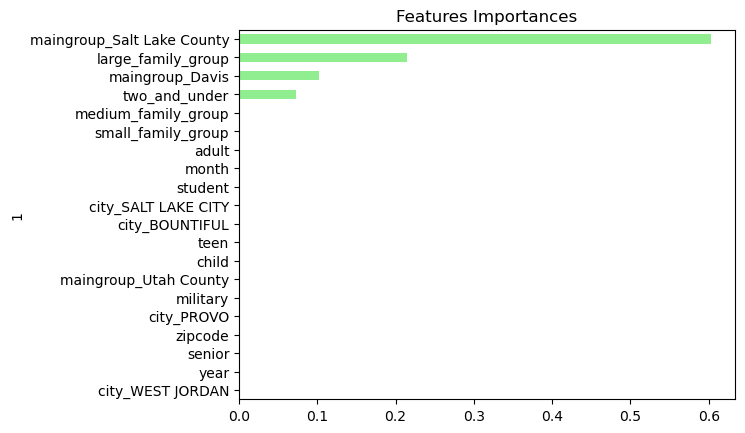

In [101]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)